In [191]:
##Commercial Case Study by Prashamsh Takkalapally

In [210]:
#Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [211]:
#Read the data from the excel
veh_excel = pd.ExcelFile ('Commercial Sale Case Study.xlsx')
veh_data = pd.read_excel (veh_excel, 'Data')

In [212]:
#Create a new dataframe to be modified later
veh_data_df=veh_data
veh_data_df.head()

,sauci,auctionname,auctioncity,swo,sdtesa,arrivaldate,sser17,JD_POWERS_CAT_DESC,JD_POWERS_SUB_CAT_DESC,dmpostcond,...,YMM,volseg,Velocity,DSO,Unnamed: 34,MMR,AdjMMR,SREMAR,SANNOU,abnormal
0,RAA,Manheim Riverside,Riverside,2291908,20161115,20161103,19XFB2F89DE258267,COMPACT CAR,PREMIUM,3.8,...,2013_Honda_CivicSdn,Tier1,Hot,NaN,1,10375.0,10632.0,NaN,DMV$133,0
1,MAAI,Manheim Minneapolis,Maple Grove,2388041,20160727,20160709,1C3CCBBB3DN689978,MIDSIZE CAR,PREMIUM,4.2,...,2013_Chrysler_200,Tier1,Hot,NaN,1,8046.0,8658.0,NaN,NaN,0
2,DALA,Manheim Dallas,Dallas,4741877,20160831,20160812,1C3CCCAB2FN689464,MIDSIZE CAR,PREMIUM,3.4,...,2015_Chrysler_200,Tier1,Warm,NaN,1,11484.0,11457.0,NaN,NaN,0
3,FAAO,Manheim Orlando,Ocoee,3479240,20161129,20161102,1C3CCCAB9FN612381,MIDSIZE CAR,PREMIUM,2.0,...,2015_Chrysler_200,Tier1,Warm,NaN,1,9130.0,7681.0,NaN,NaN,0
4,DALA,Manheim Dallas,Dallas,4777897,20161026,20160927,1C3CDFBB9FD331412,MIDSIZE CAR,PREMIUM,4.2,...,2015_Dodge_Dart,Tier1,Hot,NaN,1,9804.0,9880.0,NaN,NaN,0


In [213]:
veh_data_df.describe()

,swo,sdtesa,arrivaldate,dmpostcond,dmprecond,smiles,dmsold,MID_YEAR,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,DSO,Unnamed: 34,MMR,AdjMMR,abnormal
count,4.040300e+04,4.040300e+04,4.040300e+04,40403.000000,40398.000000,40403.000000,40403.000000,40403.000000,40384.000000,40403.000000,40403.000000,40403.000000,38457.000000,40403.000000,39513.000000,39513.000000,40403.000000
mean,3.788557e+06,2.016097e+07,2.016086e+07,3.786538,3.645423,32274.356533,0.683588,2004.442838,12502.871682,42.175037,16.210306,127.815930,81.365631,0.048165,12382.354636,12305.930428,0.041408
std,1.538417e+06,1.662672e+02,2.181099e+02,0.682171,0.699093,16976.602713,0.465082,135.650049,3922.255696,11.486279,10.654894,98.830541,140.799408,0.214117,3698.859164,3723.250915,0.199234
min,1.426087e+06,2.016070e+07,2.015082e+07,0.000000,0.000000,36.000000,0.000000,-1.000000,1000.000000,26.000000,1.000000,1.000000,0.700576,0.000000,1605.000000,1377.000000,0.000000
25%,2.500648e+06,2.016082e+07,2.016072e+07,3.500000,3.300000,22742.000000,0.000000,2013.000000,10000.000000,34.000000,9.000000,54.000000,33.261391,0.000000,9989.000000,9919.000000,0.000000
50%,3.461794e+06,2.016093e+07,2.016090e+07,3.900000,3.700000,31852.000000,1.000000,2013.000000,11500.000000,41.000000,15.000000,110.000000,50.940534,0.000000,11384.000000,11381.000000,0.000000
75%,4.793224e+06,2.016111e+07,2.016101e+07,4.300000,4.200000,39922.500000,1.000000,2014.000000,14300.000000,48.000000,19.000000,182.000000,83.950000,0.000000,14062.000000,14032.000000,0.000000
max,8.527825e+06,2.016123e+07,2.016122e+07,5.000000,5.000000,999999.000000,1.000000,2017.000000,146300.000000,454.000000,77.000000,1155.000000,11315.000000,1.000000,58624.000000,58624.000000,1.000000


In [214]:
#Variables with missing values
vars_with_na = [var for var in veh_data_df.columns if veh_data_df[var].isnull().sum() > 0]
veh_data_df[vars_with_na].isnull().mean().sort_values(ascending=False)

SANNOU                    0.655669
SREMAR                    0.559859
stime                     0.308814
DSO                       0.048165
JD_POWERS_SUB_CAT_DESC    0.032448
JD_POWERS_CAT_DESC        0.032448
AdjMMR                    0.022028
MMR                       0.022028
Velocity                  0.012103
volseg                    0.012029
YMM                       0.012029
color                     0.001262
sfloor                    0.000470
dmprecond                 0.000124
sflndr                    0.000050
ch_body                   0.000025
dtype: float64

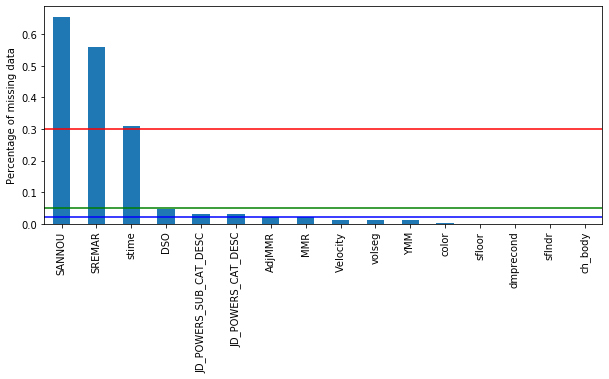

In [215]:
#Histogram of variables with missing values
veh_data_df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.30,color='r',linestyle='-')
plt.axhline(y=0.05,color='g',linestyle='-')
plt.axhline(y=0.02,color='b',linestyle='-')
plt.show()

In [216]:
veh_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40403 entries, 0 to 40402
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sauci                   40403 non-null  object 
 1   auctionname             40403 non-null  object 
 2   auctioncity             40403 non-null  object 
 3   swo                     40403 non-null  int64  
 4   sdtesa                  40403 non-null  int64  
 5   arrivaldate             40403 non-null  int64  
 6   sser17                  40403 non-null  object 
 7   JD_POWERS_CAT_DESC      39092 non-null  object 
 8   JD_POWERS_SUB_CAT_DESC  39092 non-null  object 
 9   dmpostcond              40403 non-null  float64
 10  dmprecond               40398 non-null  float64
 11  smiles                  40403 non-null  int64  
 12  color                   40352 non-null  object 
 13  dmsold                  40403 non-null  int64  
 14  MID                     40403 non-null

In [217]:
#Identify categorical variables
cat_vars = [var for var in veh_data_df.columns if veh_data_df[var].dtype == 'O']
len(cat_vars)

23

In [218]:
#Identify numerical variables
num_vars = [var for var in veh_data_df.columns if var not in cat_vars and var!='dmsold']
len(num_vars)

16

In [219]:
#Identifying categorical and numerical variables with missing values
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print('number of categorical variables with na: ', len(cat_na))
print('number of numerical variables with na:', len(num_na))

number of categorical variables with na:  11
number of numerical variables with na: 5


In [220]:
#continous variables
cont_vars=[var for var in num_vars if var not in discrete_vars+year_vars]
print('Number of continuos variables:', len(cont_vars))

Number of continuos variables: 12


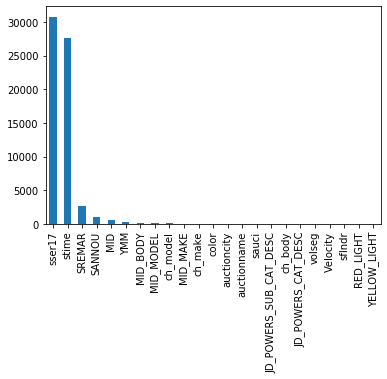

In [221]:
#Finding highly cardinal variables
veh_data_df[cat_vars].nunique().sort_values(ascending=False).plot.bar()

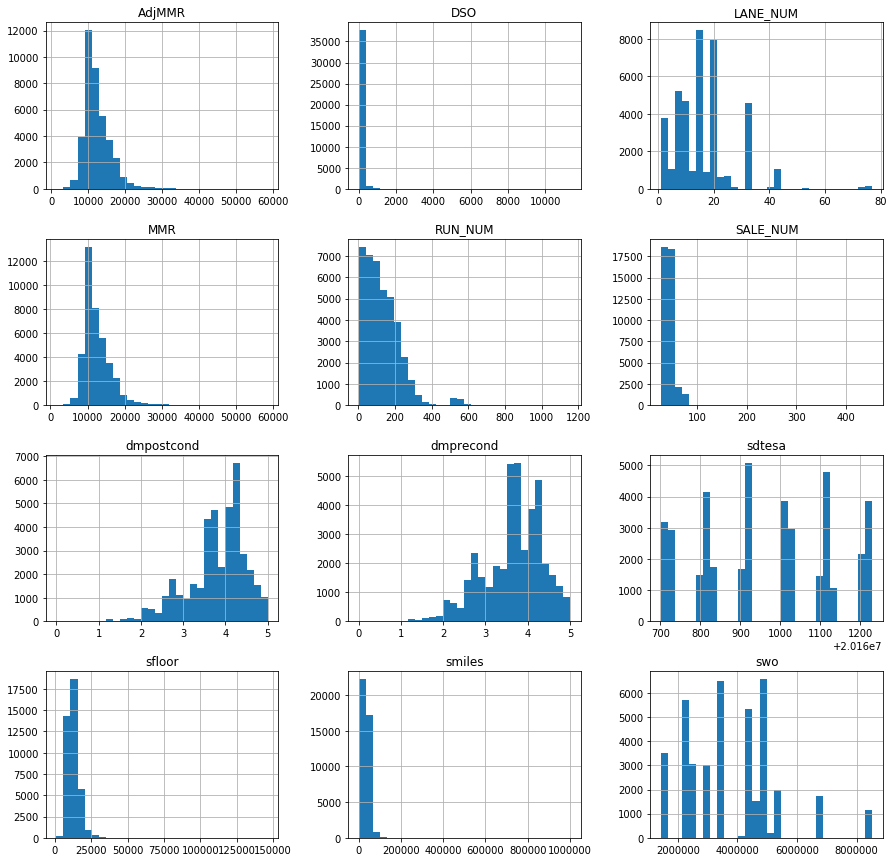

In [223]:
#finding distribution of continuos variables
veh_data_df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [224]:
num_na

['dmprecond', 'sfloor', 'DSO', 'MMR', 'AdjMMR']

In [225]:
cat_na

['JD_POWERS_CAT_DESC',
 'JD_POWERS_SUB_CAT_DESC',
 'color',
 'ch_body',
 'stime',
 'sflndr',
 'YMM',
 'volseg',
 'Velocity',
 'SREMAR',
 'SANNOU']

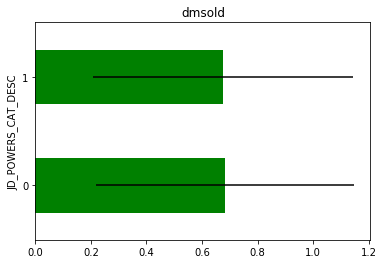

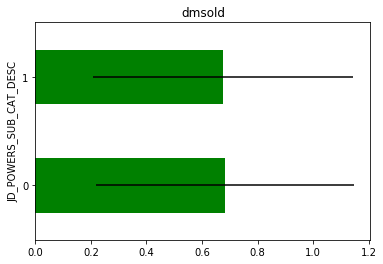

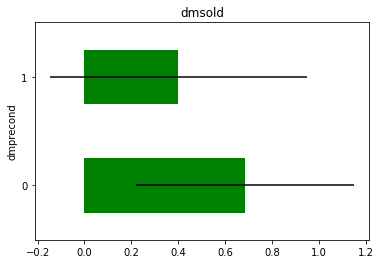

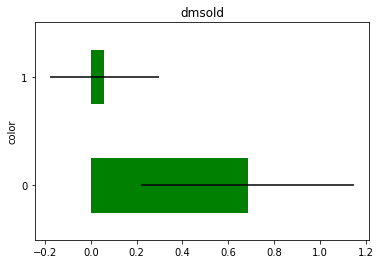

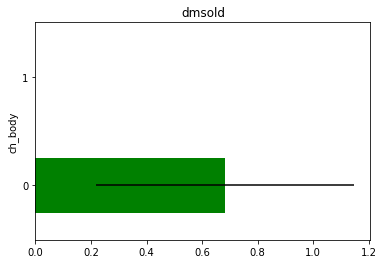

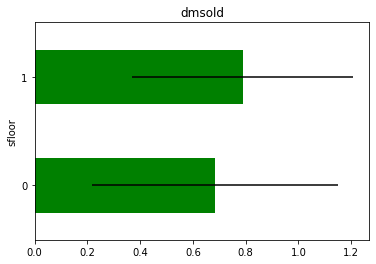

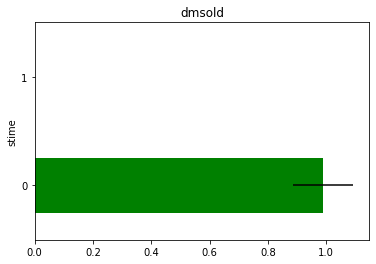

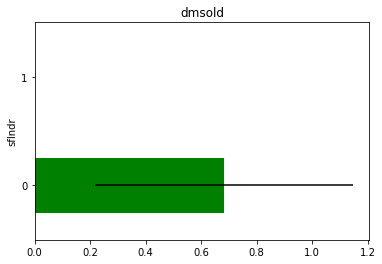

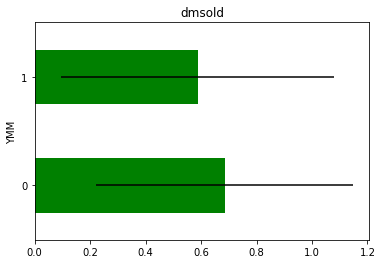

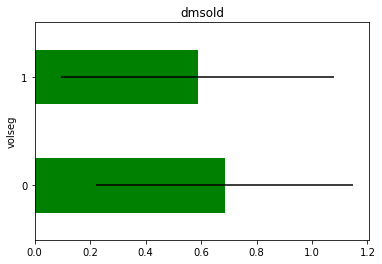

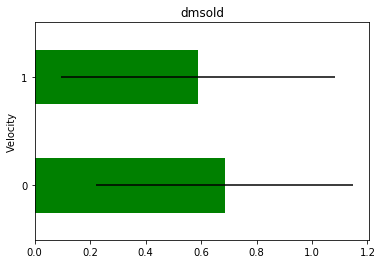

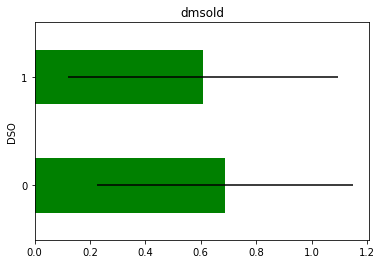

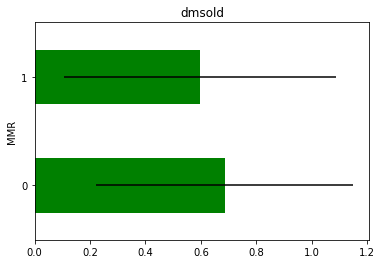

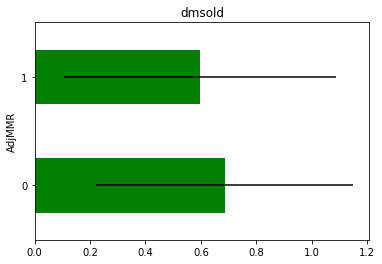

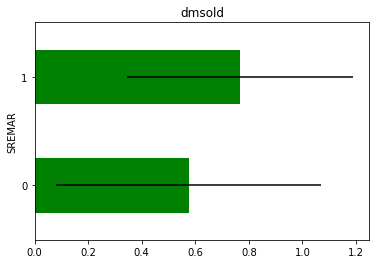

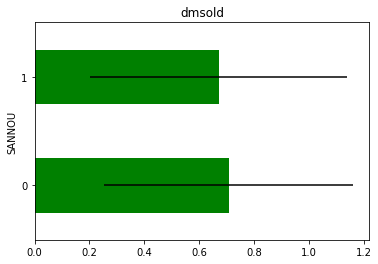

In [226]:
#Analyze the correlation of features with target variable for missing values and non-missing values
def analyze_na_value(df, var):
    df=df.copy()
    df[var]=np.where(df[var].isnull(),1,0)
    tmp=df.groupby(var)['dmsold'].agg(['mean','std'])
    tmp.plot(kind='barh',y='mean', legend=False,xerr='std',title='dmsold',color='green')
    plt.show()
for var in vars_with_na:
    analyze_na_value(veh_data_df, var)

In [227]:
#Identifying the correlation between variables
veh_data_df.corr()

,swo,sdtesa,arrivaldate,dmpostcond,dmprecond,smiles,dmsold,MID_YEAR,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,DSO,Unnamed: 34,MMR,AdjMMR,abnormal
swo,1.000000,0.071945,0.095118,-0.037186,0.022061,0.000234,-0.035878,0.011418,0.000672,0.208805,0.267255,-0.026781,-0.044736,0.061574,0.006751,0.008726,0.033710
sdtesa,0.071945,1.000000,0.713204,0.024791,0.007671,-0.023187,-0.101628,-0.018748,0.008103,0.675064,-0.071150,-0.073312,0.117128,0.217948,-0.008303,-0.010015,0.002871
arrivaldate,0.095118,0.713204,1.000000,0.015672,0.017015,-0.024451,-0.062273,0.012666,-0.002656,0.493177,-0.036442,-0.047136,0.075723,0.138948,-0.019700,-0.018428,-0.010467
dmpostcond,-0.037186,0.024791,0.015672,1.000000,0.906825,-0.259255,0.065033,-0.016072,0.336814,0.015504,-0.036989,-0.435432,0.092792,0.022367,0.223657,0.336037,-0.427068
dmprecond,0.022061,0.007671,0.017015,0.906825,1.000000,-0.237459,0.071665,-0.014755,0.322167,0.007047,-0.010320,-0.378428,0.091073,0.019514,0.219970,0.343328,-0.374594
smiles,0.000234,-0.023187,-0.024451,-0.259255,-0.237459,1.000000,-0.044742,-0.005247,-0.242806,-0.011012,0.007708,0.237346,-0.134202,-0.021936,-0.260496,-0.272585,0.045745
dmsold,-0.035878,-0.101628,-0.062273,0.065033,0.071665,-0.044742,1.000000,0.020759,-0.099594,-0.090540,-0.003389,-0.042299,-0.061004,-0.036354,-0.073982,-0.057693,-0.022877
MID_YEAR,0.011418,-0.018748,0.012666,-0.016072,-0.014755,-0.005247,0.020759,1.000000,-0.028786,-0.032566,0.004977,0.019681,0.295799,-0.299869,0.021543,0.021603,0.004599
sfloor,0.000672,0.008103,-0.002656,0.336814,0.322167,-0.242806,-0.099594,-0.028786,1.000000,-0.020232,-0.056769,-0.156895,0.152149,0.073852,0.946325,0.952364,-0.111454
SALE_NUM,0.208805,0.675064,0.493177,0.015504,0.007047,-0.011012,-0.090540,-0.032566,-0.020232,1.000000,0.317930,0.032435,0.028939,0.157756,-0.011017,-0.011889,0.019351


In [228]:
#Impute prices related columns with mean of the columns. Calculate ratio as sfloor/MMR ratio
veh_data_df = veh_data_df.dropna(subset=['sfloor', 'MMR'])
veh_data_df['sfloor'].fillna(value=veh_data_df['sfloor'].mean(), inplace=True)
veh_data_df['MMR'].fillna(value=veh_data_df['MMR'].mean(), inplace=True)
veh_data_df['AdjMMR'].fillna(value=veh_data_df['AdjMMR'].mean(), inplace=True)
veh_data_df['sfloor_mmr_ratio'] = veh_data_df['sfloor']/veh_data_df['MMR']

C:\Users\Public\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


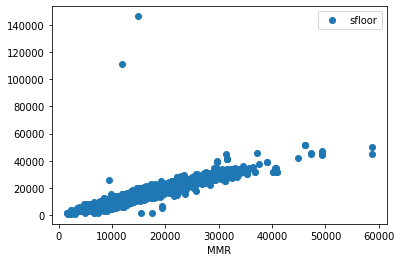

In [229]:
#Identifying the correlatioon between MMR and Sfloor and also looking for potential outliers
veh_data_df['MMR'].corr(veh_data_df['sfloor'])
veh_data_df.plot(x='MMR', y='sfloor', style='o')

In [230]:
#Since the relationship is linear, identifying the ratio to map with sfloor
#Finding the range of "sfloor_mmr_ratio"
veh_data_df['sfloor_mmr_ratio'] = veh_data_df['sfloor']/veh_data_df['MMR']
print('Min value of sfloor_mmr_ratio: ', veh_data_df['sfloor_mmr_ratio'].min())
print('Max value of sfloor_mmr_ratio: ', veh_data_df['sfloor_mmr_ratio'].max())

Min value of sfloor_mmr_ratio:  0.10068203962325431
Max value of sfloor_mmr_ratio:  9.808259587020649


C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
#removing outliers which are 3SDs away from mean
veh_data_df['z_score'] = (veh_data_df['MMR'] - veh_data_df['MMR'].mean()) / veh_data_df['MMR'].std()
veh_data_new_df = veh_data_df[(veh_data_df['z_score'] < 3) & (veh_data_df['z_score'] > -3)]
veh_data_new_df['z_score_1'] = (veh_data_new_df['sfloor'] - veh_data_new_df['sfloor'].mean()) / veh_data_new_df['sfloor'].std()
veh_data_new_df = veh_data_new_df[(veh_data_new_df['z_score_1'] < 3) & (veh_data_new_df['z_score_1'] > -3)]

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


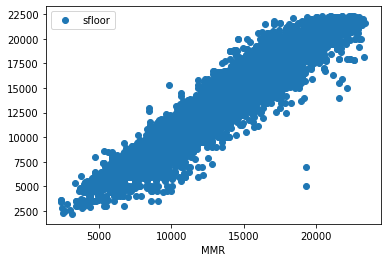

In [232]:
#plotting after removing the outliers
veh_data_new_df.plot(x='MMR', y='sfloor', style='o')

In [233]:
#finding minimum and maximum ratio after removing outliers
print('Min value of sfloor_mmr_ratio: ', veh_data_new_df['sfloor_mmr_ratio'].min())
print('Max value of sfloor_mmr_ratio: ', veh_data_new_df['sfloor_mmr_ratio'].max())

Min value of sfloor_mmr_ratio:  0.2591479216336685
Max value of sfloor_mmr_ratio:  1.7086715079026058


In [234]:
#rounding off the sfloor_mmr_ratio to 2 decimals for further anlaysis and identifying correlation with sale probablity
veh_data_new_df['sfloor_mmr_round_decim']=veh_data_new_df['sfloor_mmr_ratio'].round(decimals = 2)

In [235]:
veh_data_new_df.head(5)

,sauci,auctionname,auctioncity,swo,sdtesa,arrivaldate,sser17,JD_POWERS_CAT_DESC,JD_POWERS_SUB_CAT_DESC,dmpostcond,...,Unnamed: 34,MMR,AdjMMR,SREMAR,SANNOU,abnormal,sfloor_mmr_ratio,z_score,z_score_1,sfloor_mmr_round_decim
0,RAA,Manheim Riverside,Riverside,2291908,20161115,20161103,19XFB2F89DE258267,COMPACT CAR,PREMIUM,3.8,...,1,10375.0,10632.0,NaN,DMV$133,0,0.915663,-0.542544,-0.811788,0.92
1,MAAI,Manheim Minneapolis,Maple Grove,2388041,20160727,20160709,1C3CCBBB3DN689978,MIDSIZE CAR,PREMIUM,4.2,...,1,8046.0,8658.0,NaN,NaN,0,0.969426,-1.172327,-1.317958,0.97
2,DALA,Manheim Dallas,Dallas,4741877,20160831,20160812,1C3CCCAB2FN689464,MIDSIZE CAR,PREMIUM,3.4,...,1,11484.0,11457.0,NaN,NaN,0,1.001393,-0.242661,-0.216294,1.00
3,FAAO,Manheim Orlando,Ocoee,3479240,20161129,20161102,1C3CCCAB9FN612381,MIDSIZE CAR,PREMIUM,2.0,...,1,9130.0,7681.0,NaN,NaN,0,0.876232,-0.879204,-1.258409,0.88
4,DALA,Manheim Dallas,Dallas,4777897,20161026,20160927,1C3CDFBB9FD331412,MIDSIZE CAR,PREMIUM,4.2,...,1,9804.0,9880.0,NaN,NaN,0,0.984292,-0.696948,-0.767126,0.98


In [236]:
#finding vehicle count and sell probability wrt sfloor_mmr_ratio_round_decim
agg_cols = {'dmsold':'prob_sell', 'sauci':'event_count'}
veh_data_agg_df=veh_data_new_df[(veh_data_new_df.sfloor_mmr_ratio>=0.8)&(veh_data_new_df.sfloor_mmr_ratio<=1.2)].groupby('sfloor_mmr_round_decim', as_index=False).agg({'dmsold':'mean', 'sauci':'count'}).rename(columns=agg_cols)

In [237]:
veh_data_agg_df.head(50)

,sfloor_mmr_round_decim,prob_sell,event_count
0,0.80,0.717391,46
1,0.81,0.766667,90
2,0.82,0.647619,105
3,0.83,0.719178,146
4,0.84,0.762821,156
5,0.85,0.766667,180
6,0.86,0.657439,289
7,0.87,0.698718,312
8,0.88,0.713217,401
9,0.89,0.690909,440


In [238]:
veh_data_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sfloor_mmr_round_decim  41 non-null     float64
 1   prob_sell               41 non-null     float64
 2   event_count             41 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


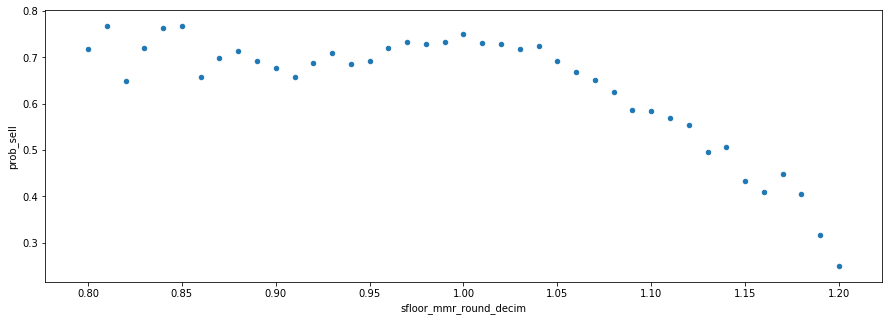

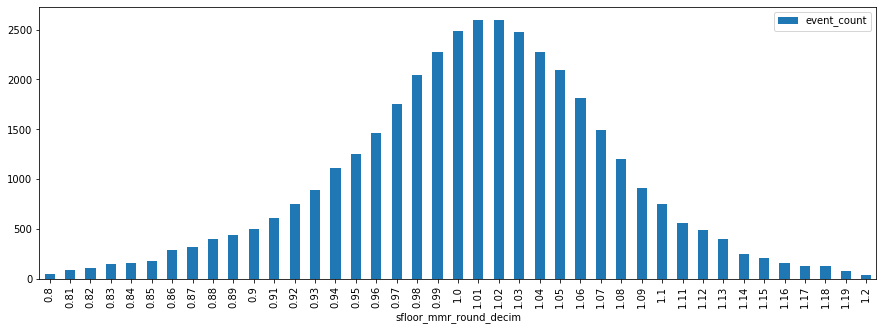

In [239]:
#slfoor_mmr_ratio correlation with sale probability
ax = veh_data_agg_df.plot.scatter(x = 'sfloor_mmr_round_decim', y = 'prob_sell',figsize=(15,5))
ax = veh_data_agg_df.plot.bar(x = 'sfloor_mmr_round_decim', y = ['event_count'],figsize=(15,5))

In [240]:
#Finding temporal variables
year_vars = [var for var in num_vars if 'YR' in var.upper() or 'YEAR' in var.upper() or 'DATE' in var.upper()]
year_vars

['arrivaldate', 'MID_YEAR']

In [241]:
#finding unique valus in tempora variables
for var in year_vars:
    print(var, veh_data_new_df[var].unique())
    print()

arrivaldate [20161103 20160709 20160812 20161102 20160927 20160808 20161122 20161024
 20160723 20160909 20161025 20161205 20160621 20160713 20160831 20161115
 20160908 20160810 20160517 20161114 20160715 20161028 20160729 20160629
 20161005 20161026 20160818 20160725 20160727 20160801 20160614 20161012
 20160922 20160802 20160718 20160627 20160830 20161117 20161110 20161206
 20161116 20160817 20160930 20160920 20161001 20161104 20160824 20161118
 20160720 20160721 20160705 20160919 20160924 20160926 20161018 20161020
 20160711 20161108 20161101 20160726 20160923 20161021 20161006 20160622
 20160601 20160717 20160804 20160628 20160730 20160708 20160623 20160929
 20160907 20160608 20160823 20160901 20160512 20160928 20160821 20160602
 20160613 20160316 20160915 20161107 20160819 20160630 20160803 20160616
 20160625 20160712 20160829 20161004 20160527 20160921 20160706 20160806
 20160827 20160816 20160825 20160610 20161003 20160624 20160811 20160606
 20160719 20160701 20160913 20161201 20

Text(0, 0.5, 'Sell Rate')

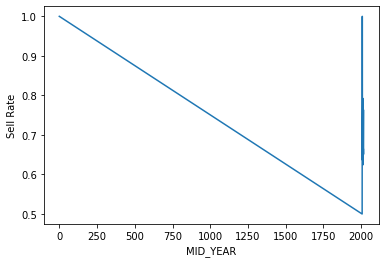

In [242]:
#Identifying tempora variable correlation with sale
veh_data_new_df.groupby('MID_YEAR')['dmsold'].mean().plot()
plt.ylabel('Sell Rate')

In [243]:
#Removing outliers in ttemporal variables
veh_data_new_df['MID_YEAR_Z'] = (veh_data_new_df['MID_YEAR'] - veh_data_new_df['MID_YEAR'].mean()) / veh_data_new_df['MID_YEAR'].std()
veh_data_new_df.head()
veh_data_new_df = veh_data_new_df[(veh_data_new_df['MID_YEAR_Z'] < 3) & (veh_data_new_df['MID_YEAR_Z'] > -3)]

Text(0, 0.5, 'Sell Rate')

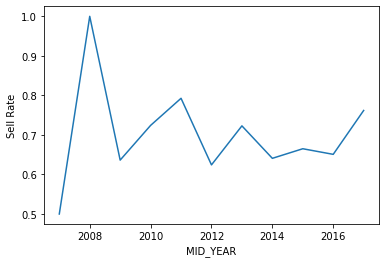

In [244]:
#plot distribution wrt sale after removing outliers
veh_data_new_df.groupby('MID_YEAR')['dmsold'].mean().plot()
plt.ylabel('Sell Rate')


In [245]:
#Identify discrete variables
discrete_vars=[var for var in num_vars if len(veh_data_new_df[var].unique())<20 and var not in year_vars]
print('Number of discrete variables:', len(discrete_vars))

Number of discrete variables: 2


In [246]:
#Removing outliers in other temporal variables
veh_data_new_df['arrivaldate_z'] = (veh_data_new_df['arrivaldate'] - veh_data_new_df['arrivaldate'].mean()) / veh_data_new_df['arrivaldate'].std()
veh_data_new_df.head()
veh_data_new_df = veh_data_new_df[(veh_data_new_df['arrivaldate_z'] < 3) & (veh_data_new_df['arrivaldate_z'] > -3)]

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Sell Rate')

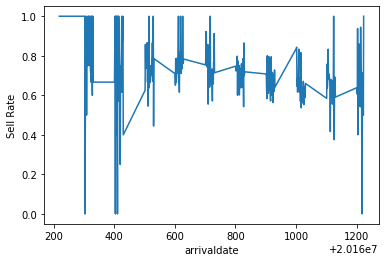

In [247]:
#Plot after removing outliers
veh_data_new_df.groupby('arrivaldate')['dmsold'].mean().plot()
plt.ylabel('Sell Rate')

In [248]:
#Identifying correlation of city with probability of sell
agg_cols = {'dmsold':'prob_sell', 'sauci':'event_count'}
veh_data_auction_city_agg_df=veh_data_df.groupby('auctioncity', as_index=False).agg({'dmsold':'mean', 'sauci':'count'}).rename(columns=agg_cols)

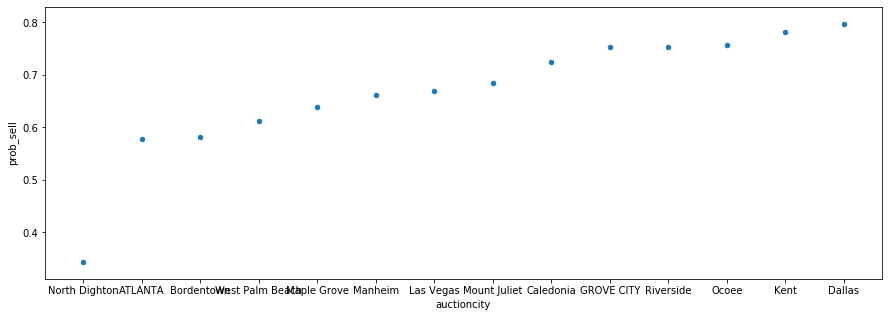

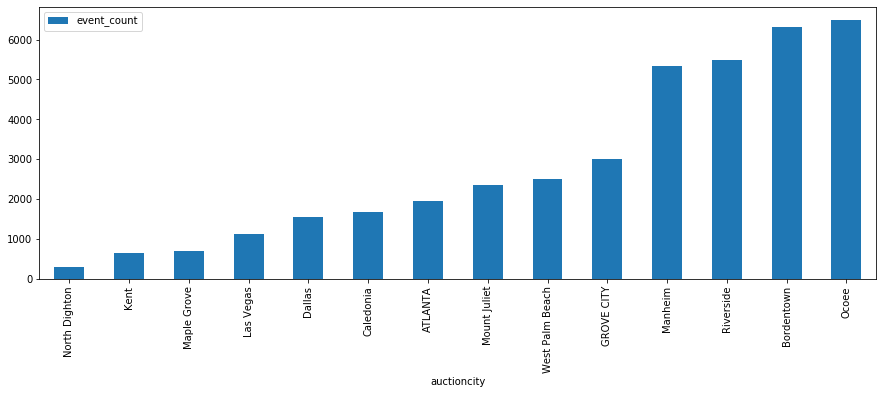

In [249]:
#Identifying correlation of city with probability of sell
ax = veh_data_auction_city_agg_df.sort_values(by='prob_sell').plot.scatter(x = 'auctioncity', y = 'prob_sell', figsize=(15,5))
ax = veh_data_auction_city_agg_df.sort_values(by='event_count').plot.bar(x = 'auctioncity', y = ['event_count'], figsize=(15,5))

In [250]:
#Class mapping of ordinal variables
veh_data_new_df = veh_data_new_df.replace({'volseg': {'Tier1': 1, 'Tier2': 2, 'Tier3': 3, 'Tier4': 4, 'Tier5': 5}})
veh_data_new_df = veh_data_new_df.replace({'Velocity': {'Cold': 1, 'Warm': 2, 'Hot': 3}})

In [251]:
veh_data_new_df.replace('', np.nan, inplace=True)
veh_data_new_df = veh_data_new_df.dropna(subset=['volseg', 'Velocity'])

In [252]:
# target encoding of highly cardinal variables
from category_encoders import TargetEncoder
encoder = TargetEncoder()
veh_data_new_df['sauci_encoded'] = encoder.fit_transform(veh_data_new_df['sauci'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['auctioncity_encoded'] = encoder.fit_transform(veh_data_new_df['auctioncity'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['JD_POWERS_CAT_DESC_encoded'] = encoder.fit_transform(veh_data_new_df['JD_POWERS_CAT_DESC'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['JD_POWERS_SUB_CAT_DESC_encoded'] = encoder.fit_transform(veh_data_new_df['JD_POWERS_SUB_CAT_DESC'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['color_encoded'] = encoder.fit_transform(veh_data_new_df['color'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['MID_YEAR_encoded'] = encoder.fit_transform(veh_data_new_df['MID_YEAR'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['MID_MAKE_encoded'] = encoder.fit_transform(veh_data_new_df['MID_MAKE'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['arrivaldate_encoded'] = encoder.fit_transform(veh_data_new_df['arrivaldate'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['arrivaldate_encoded'] = encoder.fit_transform(veh_data_new_df['arrivaldate'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['MID_MODEL_encoded'] = encoder.fit_transform(veh_data_new_df['MID_MODEL'], veh_data_new_df['dmsold'])
encoder = TargetEncoder()
veh_data_new_df['MID_BODY_encoded'] = encoder.fit_transform(veh_data_new_df['MID_BODY'], veh_data_new_df['dmsold'])


In [253]:
#One hot encoding of low cardinal variables. Also renaming one of the feature without column name
veh_data_new_df.rename(columns = {'Unnamed: 34':'Unnamed'}, inplace = True)
categorical_columns = ['sflndr', 'RED_LIGHT', 'YELLOW_LIGHT','Unnamed','abnormal']
for column in categorical_columns:
    tempdf = pd.get_dummies(veh_data_new_df[column], prefix=column)
    veh_data_new_df = pd.merge(
        left=veh_data_new_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    #veh_data_new_df = veh_data_new_df.drop(columns=column)
veh_data_new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38563 entries, 0 to 40402
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sauci                           38563 non-null  object 
 1   auctionname                     38563 non-null  object 
 2   auctioncity                     38563 non-null  object 
 3   swo                             38563 non-null  int64  
 4   sdtesa                          38563 non-null  int64  
 5   arrivaldate                     38563 non-null  int64  
 6   sser17                          38563 non-null  object 
 7   JD_POWERS_CAT_DESC              37293 non-null  object 
 8   JD_POWERS_SUB_CAT_DESC          37293 non-null  object 
 9   dmpostcond                      38563 non-null  float64
 10  dmprecond                       38558 non-null  float64
 11  smiles                          38563 non-null  int64  
 12  color                           

In [254]:
#dropping variables which don't help the algorithm
veh_data_new_df.drop(['swo', 'sser17', 'MID', 'ch_make', 'ch_model', 'stime', 'SREMAR', 'SANNOU', 'sser17', 'stime'], axis=1, inplace=True)

In [255]:
#dropping rows with null values
veh_data_new_df.dropna(axis=0)

,sauci,auctionname,auctioncity,sdtesa,arrivaldate,JD_POWERS_CAT_DESC,JD_POWERS_SUB_CAT_DESC,dmpostcond,dmprecond,smiles,...,sflndr_L,sflndr_R,RED_LIGHT_N,RED_LIGHT_Y,YELLOW_LIGHT_N,YELLOW_LIGHT_Y,Unnamed_0,Unnamed_1,abnormal_0,abnormal_1
76,NADE,Manheim New Jersey,Bordentown,20161130,20161110,SUV,ENTRY,2.3,2.3,61624,...,0,1,1,0,1,0,1,0,1,0
80,OAA,Manheim Ohio,GROVE CITY,20161206,20160924,SUV,ENTRY,3.4,2.8,53809,...,1,0,1,0,1,0,1,0,1,0
81,OAA,Manheim Ohio,GROVE CITY,20161206,20160926,SUV,ENTRY,3.4,3.4,93498,...,1,0,1,0,0,1,1,0,0,1
82,OAA,Manheim Ohio,GROVE CITY,20161227,20160926,SUV,ENTRY,3.4,3.4,93498,...,1,0,1,0,0,1,1,0,0,1
83,NADE,Manheim New Jersey,Bordentown,20161102,20161018,COMPACT CAR,PREMIUM,4.2,4.1,1655,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40382,NASH,Manheim Nashville,Mount Juliet,20161102,20160831,SUV,ENTRY,4.7,4.7,15620,...,0,1,1,0,1,0,1,0,1,0
40383,NASH,Manheim Nashville,Mount Juliet,20161019,20160831,SUV,ENTRY,4.7,4.7,15620,...,0,1,1,0,1,0,1,0,1,0
40386,FAAO,Manheim Orlando,Ocoee,20161108,20161018,SUV,ENTRY,5.0,5.0,2249,...,0,1,1,0,1,0,1,0,1,0
40389,FAAO,Manheim Orlando,Ocoee,20161213,20161108,SUV,ENTRY,5.0,5.0,9976,...,1,0,1,0,1,0,1,0,1,0


In [256]:
veh_data_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38563 entries, 0 to 40402
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sauci                           38563 non-null  object 
 1   auctionname                     38563 non-null  object 
 2   auctioncity                     38563 non-null  object 
 3   sdtesa                          38563 non-null  int64  
 4   arrivaldate                     38563 non-null  int64  
 5   JD_POWERS_CAT_DESC              37293 non-null  object 
 6   JD_POWERS_SUB_CAT_DESC          37293 non-null  object 
 7   dmpostcond                      38563 non-null  float64
 8   dmprecond                       38558 non-null  float64
 9   smiles                          38563 non-null  int64  
 10  color                           38518 non-null  object 
 11  dmsold                          38563 non-null  int64  
 12  MID_YEAR                        

In [257]:
veh_data_new_df.columns

Index(['sauci', 'auctionname', 'auctioncity', 'sdtesa', 'arrivaldate',
       'JD_POWERS_CAT_DESC', 'JD_POWERS_SUB_CAT_DESC', 'dmpostcond',
       'dmprecond', 'smiles', 'color', 'dmsold', 'MID_YEAR', 'MID_MAKE',
       'MID_MODEL', 'MID_BODY', 'ch_body', 'sfloor', 'SALE_NUM', 'LANE_NUM',
       'RUN_NUM', 'sflndr', 'RED_LIGHT', 'YELLOW_LIGHT', 'YMM', 'volseg',
       'Velocity', 'DSO', 'Unnamed', 'MMR', 'AdjMMR', 'abnormal',
       'sfloor_mmr_ratio', 'z_score', 'z_score_1', 'sfloor_mmr_round_decim',
       'MID_YEAR_Z', 'arrivaldate_z', 'sauci_encoded', 'auctioncity_encoded',
       'JD_POWERS_CAT_DESC_encoded', 'JD_POWERS_SUB_CAT_DESC_encoded',
       'color_encoded', 'MID_YEAR_encoded', 'MID_MAKE_encoded',
       'arrivaldate_encoded', 'MID_MODEL_encoded', 'MID_BODY_encoded',
       'sflndr_L', 'sflndr_R', 'RED_LIGHT_N', 'RED_LIGHT_Y', 'YELLOW_LIGHT_N',
       'YELLOW_LIGHT_Y', 'Unnamed_0', 'Unnamed_1', 'abnormal_0', 'abnormal_1'],
      dtype='object')

In [258]:
#dropping values with null values which were not removed earlier
veh_data_new_df = veh_data_new_df.dropna(subset=['DSO', 'dmprecond'])

In [259]:
#Preparing to fit Logistic Regression model
#Removing unwanted variables using Lasso regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X=veh_data_new_df[['sauci_encoded', 'auctioncity_encoded','sdtesa', 'arrivaldate_encoded',
        'JD_POWERS_CAT_DESC_encoded', 'JD_POWERS_SUB_CAT_DESC_encoded', 'dmpostcond',
       'dmprecond', 'smiles', 'color_encoded', 'MID_YEAR_encoded', 'MID_MAKE_encoded',
       'MID_MODEL_encoded', 'MID_BODY_encoded','sfloor',
       'LANE_NUM', 'RUN_NUM', 'RED_LIGHT_Y','RED_LIGHT_N','YELLOW_LIGHT_N','YELLOW_LIGHT_Y',
       'volseg', 'Velocity', 'DSO', 'MMR',
       'AdjMMR', 'abnormal_0', 'abnormal_1','sfloor_mmr_ratio', 'sfloor_mmr_round_decim','sflndr_L', 'sflndr_R','Unnamed_0','Unnamed_1']]
y=veh_data_new_df[['dmsold']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)
X_train.head()
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))
sel_.fit(X_train, y_train)
sel_.get_support().sum()
sel_.get_support()
selected_feats = X_train.columns[(sel_.get_support())]
selected_feats

Index(['sauci_encoded', 'sdtesa', 'arrivaldate_encoded', 'dmpostcond',
       'MID_YEAR_encoded', 'MID_BODY_encoded', 'sfloor', 'LANE_NUM', 'RUN_NUM',
       'volseg', 'Velocity', 'DSO', 'MMR', 'AdjMMR'],
      dtype='object')

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X=veh_data_new_df[['sauci_encoded', 'sdtesa', 'arrivaldate_encoded', 'dmpostcond',
       'MID_YEAR_encoded', 'MID_BODY_encoded', 'sfloor', 'LANE_NUM', 'RUN_NUM',
       'volseg', 'Velocity', 'DSO', 'MMR', 'AdjMMR']]
y=veh_data_new_df[['dmsold']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled  = stdscaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

log = LogisticRegression(penalty='l1', solver='liblinear')
lr_model=log.fit(X_train_scaled, y_train)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.684


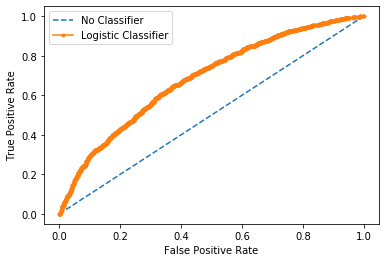

In [261]:
#ROC curve
from matplotlib import pyplot
from sklearn.metrics import *
lr_probs = lr_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<Figure size 504x504 with 0 Axes>

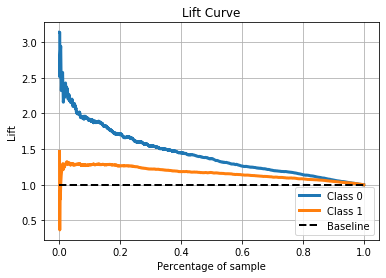

In [262]:
#Lift Chart
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test, lr_model.predict_proba(X_test_scaled))
plt.show()

In [263]:
#Logistic Regression Performance Metrics
from sklearn.metrics import *
y_pred=lr_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print ('Confusion_matrix')
print (cm)
print("Accuray Score: ",accuracy_score(y_test,y_pred))
print("Precision Score: ", precision_score(y_test,y_pred))
print("Recall Score: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Confusion_matrix
[[ 261  928]
 [ 173 2371]]
Accuray Score:  0.7050629520492901
Precision Score:  0.7187026371627766
Recall Score:  0.9319968553459119
F1 Score:  0.8115693992811912


In [264]:
#Value realization with this model
veh_data_sales_df=veh_data_new_df[(veh_data_new_df.dmsold==1)]
total_sale_dollar_revenue = veh_data_sales_df['sfloor'].sum()
print ('total revenue from sales in dollars: ',  total_sale_dollar_revenue)
print ('total revenue from sales in dollars by attending to 60% of vehicles without prediction model: ',  total_sale_dollar_revenue*0.6)
print ('total revenue from sales in dollars by attending to 60% of vehicles WITH results from prediction model: ',  total_sale_dollar_revenue*0.8)
print ('total additional revenue from sales in dollars by attending to 60% of vehicles WITH prediction model: ',  total_sale_dollar_revenue*0.2)

total revenue from sales in dollars:  307827225.0
total revenue from sales in dollars by attending to 60% of vehicles without prediction model:  184696335.0
total revenue from sales in dollars by attending to 60% of vehicles WITH results from prediction model:  246261780.0
total additional revenue from sales in dollars by attending to 60% of vehicles WITH prediction model:  61565445.0


In [265]:
## APPENDIX 1 - Deep Learning Model for sale prediction

In [266]:
#Use all the variables and fir deep learning model after data normalization
X=veh_data_new_df[['sauci_encoded', 'auctioncity_encoded','sdtesa', 'arrivaldate_encoded',
        'JD_POWERS_CAT_DESC_encoded', 'JD_POWERS_SUB_CAT_DESC_encoded', 'dmpostcond',
       'dmprecond', 'smiles', 'color_encoded', 'MID_YEAR_encoded', 'MID_MAKE_encoded',
       'MID_MODEL_encoded', 'MID_BODY_encoded','sfloor',
       'LANE_NUM', 'RUN_NUM', 'RED_LIGHT_Y','RED_LIGHT_N','YELLOW_LIGHT_N','YELLOW_LIGHT_Y',
       'volseg', 'Velocity', 'DSO', 'MMR',
       'AdjMMR', 'abnormal_0', 'abnormal_1','sfloor_mmr_ratio', 'sfloor_mmr_round_decim','sflndr_L', 'sflndr_R','Unnamed_0','Unnamed_1']]
y=veh_data_new_df['dmsold']

X = pd.get_dummies(X).to_numpy()

y = pd.get_dummies(y).to_numpy()

#splitting data into training and testing sets. Converting data into a scalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=50)

#pca = PCA(n_components=13)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)
#X_pca = pca.transform(X)

#stdscaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled = stdscaler.transform(X_train)
#X_test_scaled  = stdscaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=50)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

print (X.shape)
print(y.shape)


(37325, 34)
(37325, 2)


In [267]:
#Fit neural networking model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
NN_model = Sequential()


# The Input Layer :

NN_model.add(Dense(100, input_dim = 34, activation='relu'))



# The Hidden Layers :

NN_model.add(Dense(200, activation='relu'))
NN_model.add(Dense(50, activation='relu'))

NN_model.add(Dense(15, activation='relu'))

NN_model.add(Dense(2, activation='sigmoid'))



# Compile the network :
sgd = SGD(lr=0.005)

NN_model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               3500      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_9 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 32        
Total params: 34,547
Trainable params: 34,547
Non-trainable params: 0
_________________________________________________________________


In [268]:
# Defining parameters to fit the neural network model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=3, mode='auto')

checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0, save_best_only=True)

In [269]:
# Fitting the neural network model

history = NN_model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), batch_size = 128, callbacks=[monitor, checkpointer], verbose=0, epochs=100)
NN_model.load_weights('best_weights.hdf5')

Epoch 00024: early stopping


In [270]:
# Performance metrics for neural network model
pred=NN_model.predict(X_test_scaled)
y_pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print ('Confusion_matrix')
print (cm)
print (classification_report(y_test,y_pred))

Confusion_matrix
[[ 422  725]
 [ 310 2276]]
              precision    recall  f1-score   support

           0       0.58      0.37      0.45      1147
           1       0.76      0.88      0.81      2586

    accuracy                           0.72      3733
   macro avg       0.67      0.62      0.63      3733
weighted avg       0.70      0.72      0.70      3733



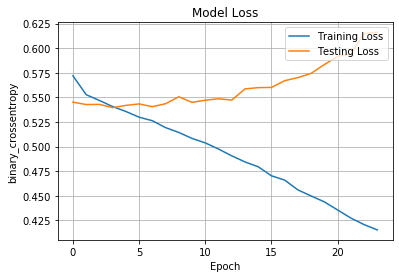

Loss after final iteration:  0.6161509523946096


In [271]:
# Plotting and claculating loss for neural network
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('binary_crossentropy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()
print ("Loss after final iteration: ", history.history['val_loss'][-1])

Accuracy after final iteration:  0.7183230519294739


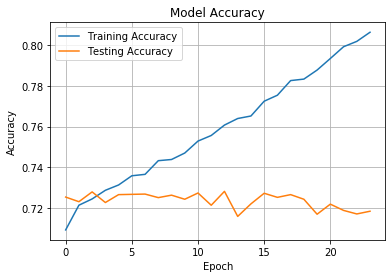

In [272]:
#Plotting accuracy and calculating accuracy for neural network model
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper left')
print ("Accuracy after final iteration: ", history.history['val_accuracy'][-1])
plt.show()

In [273]:
## Appendix # 2 for Naive Bayes Model

In [274]:
#data normalization for Naive Bayes Model
X=veh_data_new_df[['sauci_encoded', 'auctioncity_encoded','sdtesa', 'arrivaldate_encoded',
        'JD_POWERS_CAT_DESC_encoded', 'JD_POWERS_SUB_CAT_DESC_encoded', 'dmpostcond',
       'dmprecond', 'smiles', 'color_encoded', 'MID_YEAR_encoded', 'MID_MAKE_encoded',
       'MID_MODEL_encoded', 'MID_BODY_encoded','sfloor',
       'LANE_NUM', 'RUN_NUM', 'RED_LIGHT_Y','RED_LIGHT_N','YELLOW_LIGHT_N','YELLOW_LIGHT_Y',
       'volseg', 'Velocity', 'DSO', 'MMR',
       'AdjMMR', 'abnormal_0', 'abnormal_1','sfloor_mmr_ratio', 'sfloor_mmr_round_decim','sflndr_L', 'sflndr_R','Unnamed_0','Unnamed_1']]
y=veh_data_new_df[['dmsold']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled  = stdscaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled)


In [275]:
#Fitting the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_model = classifier.fit(X_train_scaled, y_train)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [276]:
#Performance metrics for Naive Bayes metrics
y_pred=NB_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print ('Confusion_matrix')
print (cm)
print (classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import *
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

Confusion_matrix
[[ 354  835]
 [ 392 2152]]
              precision    recall  f1-score   support

           0       0.47      0.30      0.37      1189
           1       0.72      0.85      0.78      2544

    accuracy                           0.67      3733
   macro avg       0.60      0.57      0.57      3733
weighted avg       0.64      0.67      0.65      3733

0.671309938387356
0.7204553063274188
0.8459119496855346
0.7781594648345688


In [ ]:
## End